# Linear Regression and splitting data into training and testing
## Importing necessary libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading data

In [32]:
companies = pd.read_csv("1000_Companies.csv")
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## splitting dependent and independent variable data

In [33]:
x=companies.iloc[:,:-1]   #x contains all columns but last
y=companies.iloc[:,-1]    #y contains only last column which is target variable
print(x.head())
print(y.head())

   R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


## Checking null values

In [34]:
print(companies.isnull().any())
print(companies.dtypes)

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


## Correlation analysis

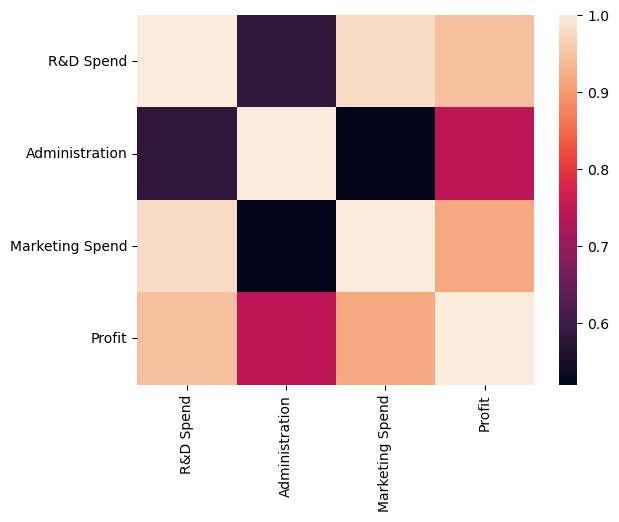

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.582434         0.978407  0.945245
Administration    0.582434        1.000000         0.520465  0.741560
Marketing Spend   0.978407        0.520465         1.000000  0.917270
Profit            0.945245        0.741560         0.917270  1.000000


In [35]:
corr_matrix=companies.corr(numeric_only=True)
sns.heatmap(corr_matrix)
plt.show()
print(corr_matrix)

## Implementing Label Encoding Encoding

In [36]:
companies.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

labelencoder=LabelEncoder()
x.iloc[:, 3] = labelencoder.fit_transform(x.iloc[:, 3])

x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,2
1,162597.70,151377.590,443898.5300,0
2,153441.51,101145.550,407934.5400,1
3,144372.41,118671.850,383199.6200,2
4,142107.34,91391.770,366168.4200,1
...,...,...,...,...
995,54135.00,118451.999,173232.6695,0
996,134970.00,130390.080,329204.0228,0
997,100275.47,241926.310,227142.8200,0
998,128456.23,321652.140,281692.3200,0


## Correlation analysis of indepndent data

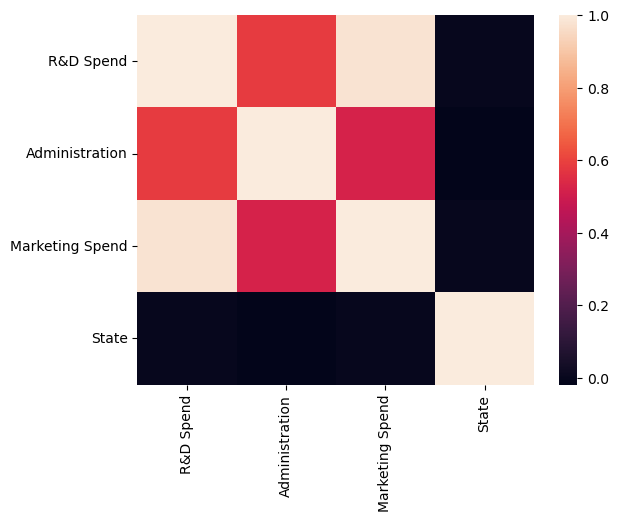

,R&D Spend,Administration,Marketing Spend,State
R&D Spend,1.000000,0.582434,0.978407,-0.001360
Administration,0.582434,1.000000,0.520465,-0.018386
Marketing Spend,0.978407,0.520465,1.000000,-0.001420
State,-0.001360,-0.018386,-0.001420,1.000000


In [38]:
sns.heatmap(x.corr())
plt.show()
x.corr()

## Splitting data into training and testing data

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=.2,random_state=0)

## Creating linear regression model and training the model

In [40]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

## Generating single random sample

In [41]:
x_test.sample(1)

,R&D Spend,Administration,Marketing Spend,State
582,41614.0,116602.8407,149073.3658,1


## predicting output for random sample

In [42]:
sample=x_test.sample(1)
y_pred=regressor.predict(sample)
#y_pred=regressor.predict([[165349.20, 136897.800, 471784.1000, 2]])
print(sample)
print(f"Profit prediction of Sample input = {y_pred[0]}")

     R&D Spend  Administration  Marketing Spend State
578   149026.0     132465.9341      356325.1131     0
Profit prediction of Sample input = 177341.8072448243


## Linear regression coefficient

In [43]:
regressor.coef_

array([ 5.27572958e-01,  8.44490415e-01,  1.06639226e-01, -3.54869857e+02])

## Intercept value

In [44]:
regressor.intercept_

-51144.72642572175

## Model evaluation using R2 score

In [50]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"R2_score ={r2_score(y_test,regressor.predict(x_test))}")

R2_score =0.9112595959622044


In [52]:
print(f"MSE: {mean_squared_error(y_test, regressor.predict(x_test))}")

MSE: 192169702.49522436
